# Comparaison des volatilités implicites dans les modèles de Black et de Bachelier

À retenir :

   - Les résultats donnent des valeurs de volatilité très différentes. Les volatilités données par le modèle de Bachelier sont beaucoup plus élevées que celles données par le modèle de Black.
   - Dans l'ensemble, sur la période 2002-2014, on observe des variations similaires dans les deux modèles. Cette similitude est assez grossière, elle est contredite par le test de Kolmogorov Smirnov.
   - Malgré tout, lors de ces périodes calmes, le modèle de Black donne des résultats moins volatiles que le modèle de Bachelier
   - Les résultats des deux modèles sont décorrélés lors des périodes ératiques
   - En revanche, le modèle de Black réagit moins bien que le modèle de Bachelier aux conditions extrêmes. Il donne des résultats très ératiques pour la période post-2014. Cela est certainement dût au fait que les banques centrales ont pratiqué des taux très bas voir négatifs. Dans ces circonstances, les modèle de Bachelier semble donner des résultats plus vraisemblables.

In [28]:
%matplotlib inline
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
from datetime import datetime


black = pd.read_csv('Databases/swaphist.csv', delimiter = ";")
print(black.shape)
black.index = range(black.shape[0])
black['Date'] = pd.to_datetime(black['Date'],dayfirst=True)
bach = pd.read_csv('Databases/Normales.csv', delimiter = ";")
bach.fillna(0, inplace=True)
bach['Date'] = pd.to_datetime(bach['Date'],dayfirst=True)

#Certaines valeurs manquent dans les relevés de volatilité
black = black.loc[black['Date'].isin(bach.Date)]
bach = bach.loc[bach['Date'].isin(black.Date)]


(741, 10)


In [97]:
recap = pd.DataFrame()

print("Black :")
for i, elem in enumerate(black) :
    if i>0:
        recap = recap.append(black[elem].describe(percentiles = [.05, .25, .5, .75, .95]))
print(recap)

recap2 = pd.DataFrame()
print("")
print("Bachelier : ")
for i, elem in enumerate(bach) :
    if i>0:
        recap2 = recap2.append(bach[elem].describe(percentiles = [.05, .25, .5, .75, .95]))
print(recap2)

Black :
              25%      5%    50%      75%     95%  count     max       mean  \
EUPG15    18.3000  13.485  26.10  46.1000  80.129  695.0  283.72  34.998748   
EUPG110   14.9000  12.535  22.30  33.4375  58.345  695.0  103.56  26.671892   
EUPG120   12.8250  11.050  21.10  28.7650  47.503  695.0   87.71  23.110295   
EUPG55    13.4000  11.950  17.00  28.7000  46.733  695.0  108.98  22.586432   
EUPG510   12.4000  11.100  16.40  26.1750  41.795  695.0   94.63  20.827791   
EUPG520   11.5750  10.000  16.80  24.6750  38.118  695.0   82.40  19.771065   
EUPG105   11.3875  10.035  14.35  22.6000  36.624  695.0   86.77  18.353813   
EUPG1010  11.1375   9.500  14.50  23.3500  36.913  695.0   85.97  18.617230   
EUPG1020  10.5250   8.700  15.35  22.2500  36.069  695.0   75.50  18.117820   

            min        std  
EUPG15    11.20  28.176095  
EUPG110   10.70  15.859995  
EUPG120    9.90  13.021891  
EUPG55    10.70  13.160882  
EUPG510    9.75  11.678310  
EUPG520    9.10  10.707546 

Ces tables nous montrent que les deux modèles donnent des résultas différents. 

Les volatilités données par le modèle de Bachelier sont moyenne beaucoup plus élevées que celles données par le modèle de Black. Les modèle de Bachelier donne aussi des volatilités au comportement plus régulier (les variances sont globalement plus faibles). 

Le swaption dont le comportement est le plus différent selon le modèle est celui de maturité 1 an ténor 5 ans. Il n'est pas significativement différent des autres dans le modèle de Bachelier alors qu'il l'est dans le modèle de Black.

Rouge : Bachelier
Bleu : Black
EUPG15


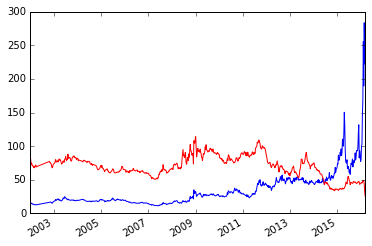

EUPG110


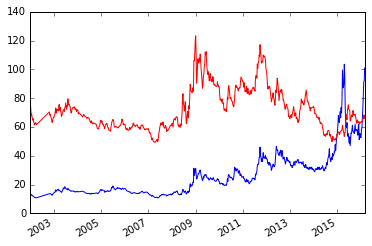

EUPG120


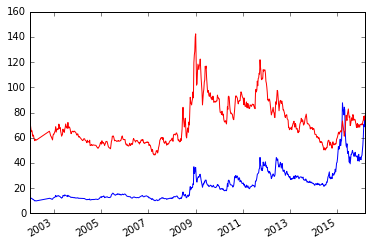

EUPG55


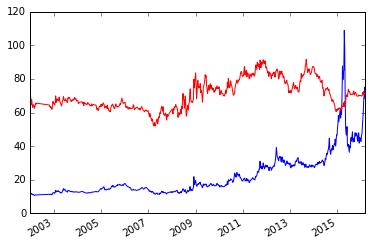

EUPG510


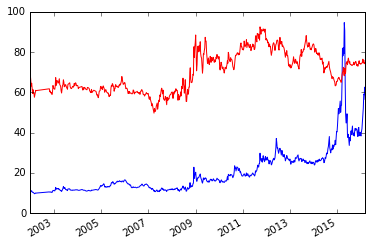

EUPG520


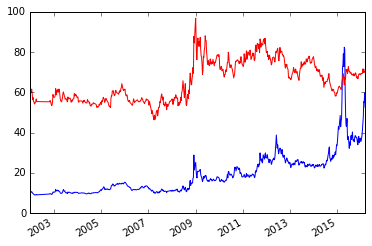

EUPG105


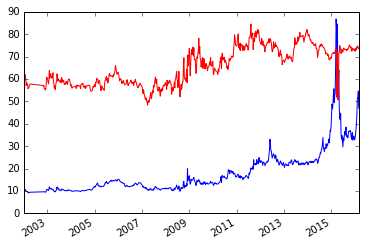

EUPG1010


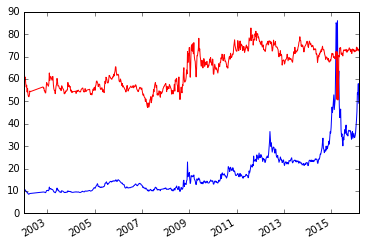

EUPG1020


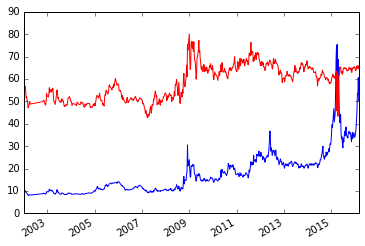

In [17]:
colors = ['RED','GREEN','BLUE','BLACK','ORANGE','PINK','BROWN','YELLOW','CYAN']
print("Rouge : Bachelier")
print("Bleu : Black")

for i, elem in enumerate(black) :
    if i>0:
        print(elem)
        fig, ax = plt.subplots()
        ax.plot_date(black['Date'], black[elem],'-',color='BLUE')
        ax.plot_date(bach['Date'], bach[elem],'-',color='RED')
        fig.autofmt_xdate()
        plt.show()

- Les 3 périodes semblent être les mêmes pour les deux swaptions. Une période régulière jusqu'en 2008, une période de pic jusqu'en 2012 puis une dernière phase de 2012 à 2016
- Sur les deux premières phases, les volatilités données par les deux modèles ont des variations similaires, bien qu'elles oscillent autour de valeurs moyennes différentes
- Dans le modèle de Bachelier, la troisième période n'est pas clairement définie. On observe une légère baisse des taux après 2012
- Dans le modèle de Black, la troisième période est une période de pic très importants. Les comportement sur cette troisième période sont donc très divergents

In [56]:
#augmenter précision
def hist(table):
    for i, elem in enumerate(table) :
        if i>0:
            print(str(elem))
            table[elem].hist()
            plt.show()


EUPG15


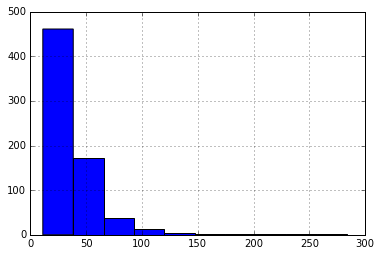

EUPG110


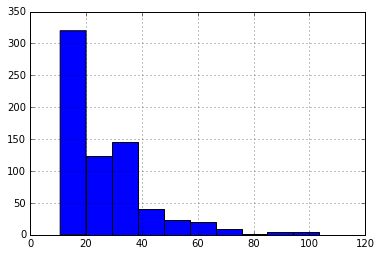

EUPG120


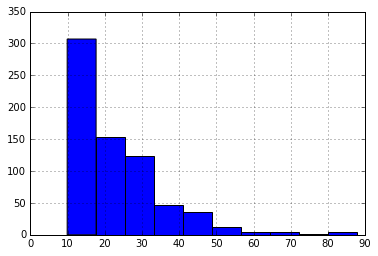

EUPG55


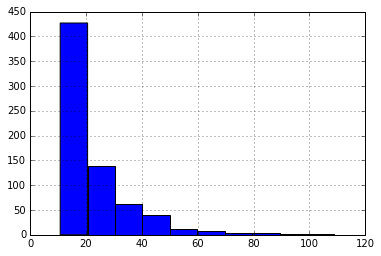

EUPG510


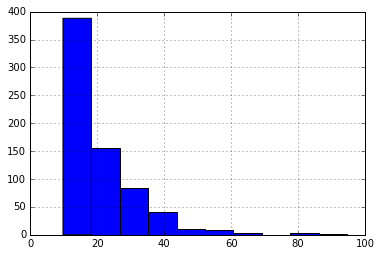

EUPG520


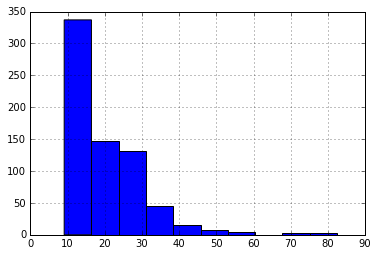

EUPG105


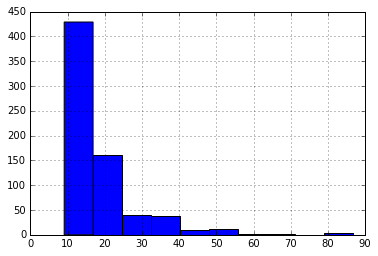

EUPG1010


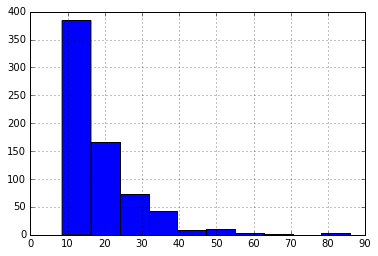

EUPG1020


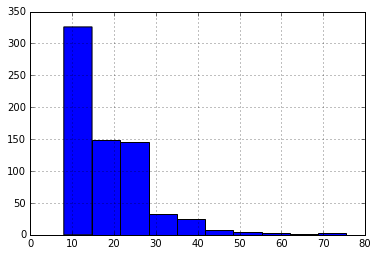

In [57]:
hist(black)

EUPG15


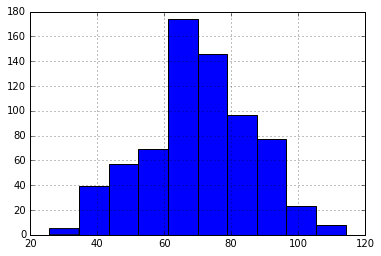

EUPG110


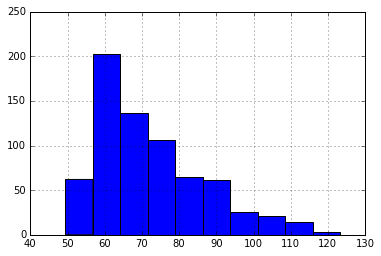

EUPG120


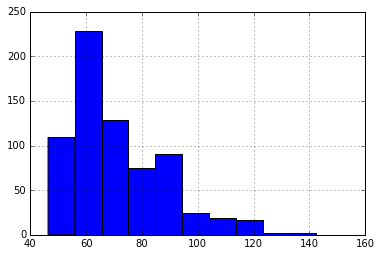

EUPG55


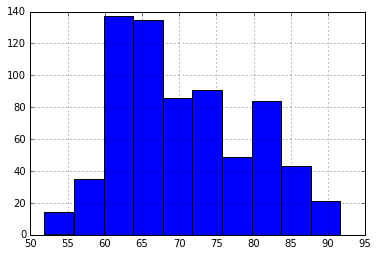

EUPG510


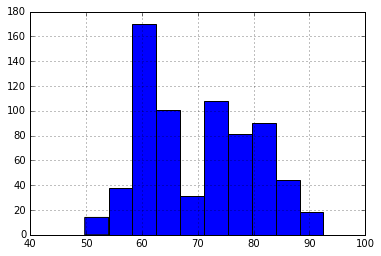

EUPG520


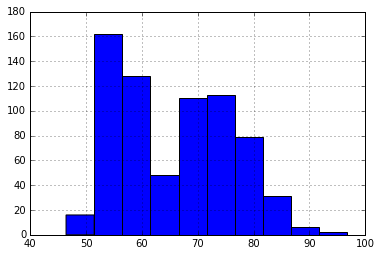

EUPG105


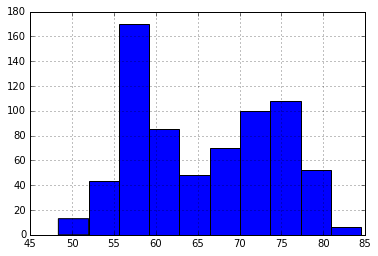

EUPG1010


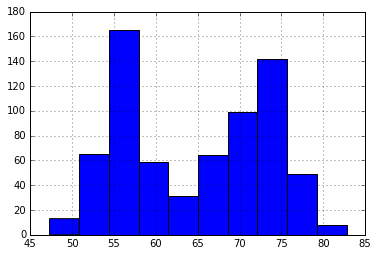

EUPG1020


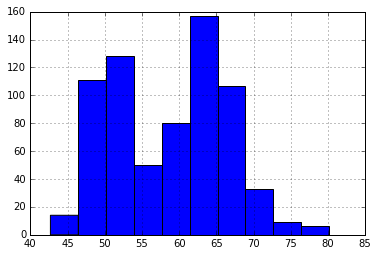

In [58]:
hist(bach)

- Dans le modèle de Black, les volatilités semnblent suivre une loi exponentielle
- Dans le modèle de Bachelier, les volatilités semblent suivre une loi normale

In [52]:
def loi(table,loi='norm'):
    for i, elem in enumerate(table) :
        if i>0:
            test,p=stats.kstest(table[elem], loi)
            if p<0.05:
                print(str(elem)," ne suit pas une loi ",loi)


In [98]:
loi(black,'expon')
loi(bach,'norm')

EUPG15  ne suit pas une loi  expon
EUPG110  ne suit pas une loi  expon
EUPG120  ne suit pas une loi  expon
EUPG55  ne suit pas une loi  expon
EUPG510  ne suit pas une loi  expon
EUPG520  ne suit pas une loi  expon
EUPG105  ne suit pas une loi  expon
EUPG1010  ne suit pas une loi  expon
EUPG1020  ne suit pas une loi  expon
EUPG15  ne suit pas une loi  norm
EUPG110  ne suit pas une loi  norm
EUPG120  ne suit pas une loi  norm
EUPG55  ne suit pas une loi  norm
EUPG510  ne suit pas une loi  norm
EUPG520  ne suit pas une loi  norm
EUPG105  ne suit pas une loi  norm
EUPG1010  ne suit pas une loi  norm
EUPG1020  ne suit pas une loi  norm


Y a t'il une corrélation dans les comportement ?

In [106]:
ans = pd.DataFrame(index=['EUPG15' 'EUPG110' 'EUPG120' 'EUPG55' 'EUPG510' 'EUPG520' 'EUPG105'
 'EUPG1010' 'EUPG1020'],columns=['EUPG15' 'EUPG110' 'EUPG120' 'EUPG55' 'EUPG510' 'EUPG520' 'EUPG105'
 'EUPG1010' 'EUPG1020'])
def corr(table, table2):
    for i, elem in enumerate(table) :
        if i>0:
            test,p=stats.ks_2samp(table[elem], table2[elem])
            if p<0.05:
                pass
            else : 
                print("Les volatilités de Bachelier et de Black sont les mêmes pour ",elem)
                fig, ax = plt.subplots()
                print(str(elem),' : ',colors[1])
                print(str(elem),' : ',colors[2])
                ax.plot_date(table['Date'], table[elem],'-',color=colors[1])
                ax.plot_date(table2['Date'], table2[elem],'-',color=colors[2])
                fig.autofmt_xdate()
                plt.show()



In [107]:
corr(black, bach)

Les modèles ne sont donc corrélés pour aucun des 9 types de swaption, d'après le test de Kolmogorov-Smirnov à 5%. 
(L'hypothèse est rejettée très fortement)

# Étude sur la période de comportement "normal", entre 2002 et Septembre 2008

In [46]:
bach1 = bach[1:307]
black1 = black[1:307]

In [99]:
recap = pd.DataFrame()

print("Black : ")
for i, elem in enumerate(black1) :
    if i>0:
        recap = recap.append(black1[elem].describe(percentiles = [.05, .25, .5, .75, .95]))
print(recap)

recap2 = pd.DataFrame()
print("")
print("Bachelier : ")
for i, elem in enumerate(bach1) :
    if i>0:
        recap2 = recap2.append(bach1[elem].describe(percentiles = [.05, .25, .5, .75, .95]))
print(recap2)

Black : 
              25%       5%     50%      75%      95%  count    max       mean  \
EUPG15    15.3000  12.4875  17.850  19.5000  21.0250  306.0  24.85  17.328170   
EUPG110   13.5000  11.3125  14.650  15.6000  17.4000  306.0  19.05  14.583660   
EUPG120   11.7500  10.5500  12.600  13.6000  15.2000  306.0  17.00  12.727696   
EUPG55    12.4250  11.3500  13.050  14.4500  16.7750  306.0  17.75  13.539134   
EUPG510   11.5000  10.6500  12.100  13.4250  15.7500  306.0  16.60  12.568873   
EUPG520   10.3500   9.7125  11.275  12.2750  14.6375  306.0  15.45  11.551144   
EUPG105   10.3625   9.7000  11.100  12.3500  14.5375  306.0  15.30  11.525163   
EUPG1010  10.0000   9.3500  10.900  11.9375  14.3250  306.0  15.05  11.181536   
EUPG1020   9.1000   8.5000  10.300  11.2500  13.5375  306.0  14.25  10.447467   

            min       std  
EUPG15    11.20  2.772100  
EUPG110   10.70  1.738155  
EUPG120    9.90  1.383941  
EUPG55    10.70  1.587436  
EUPG510    9.75  1.529643  
EUPG520    9

Les comportement sont plus lisses sur cette période que sur toute la période 2002-2016 : les variations sont plus faibles.

En revanche on constate une inversion dans la régularité des modèles : ici c'est le modèle de Black qui donne les variances les plus faibles.

Rouge : Bachelier
Bleu : Black
EUPG15


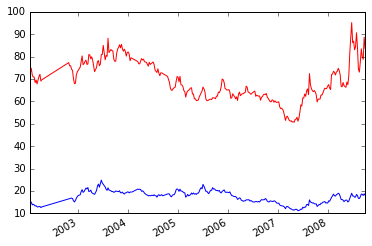

EUPG110


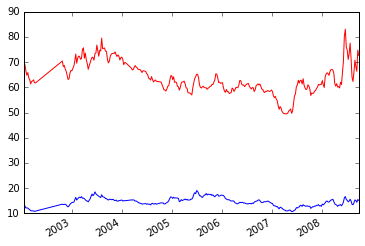

EUPG120


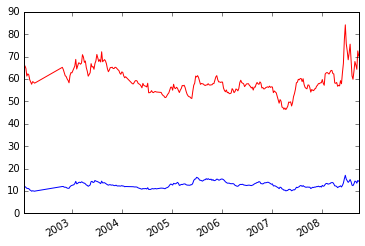

EUPG55


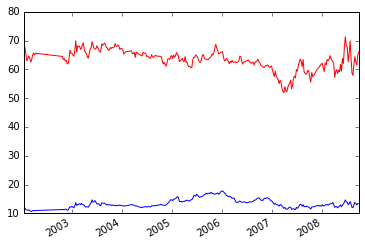

EUPG510


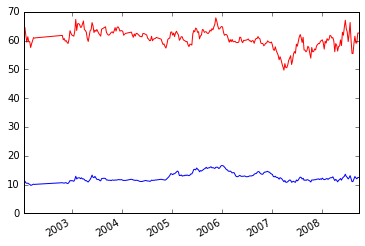

EUPG520


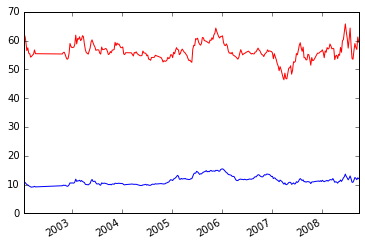

EUPG105


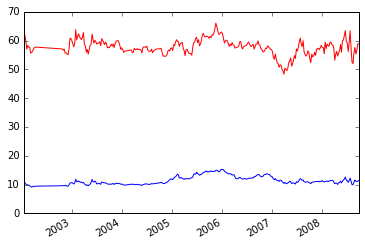

EUPG1010


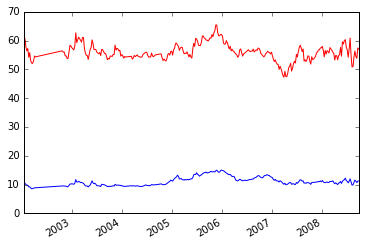

EUPG1020


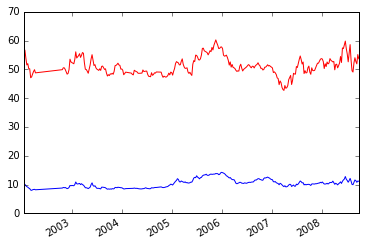

In [48]:
colors = ['RED','GREEN','BLUE','BLACK','ORANGE','PINK','BROWN','YELLOW','CYAN']
print("Rouge : Bachelier")
print("Bleu : Black")

for i, elem in enumerate(black1) :
    if i>0:
        print(elem)
        fig, ax = plt.subplots()
        ax.plot_date(black1['Date'], black1[elem],'-',color='BLUE')
        ax.plot_date(bach1['Date'], bach1[elem],'-',color='RED')
        fig.autofmt_xdate()
        plt.show()

EUPG15


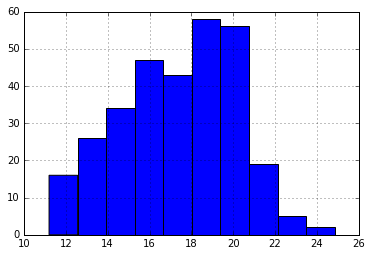

EUPG110


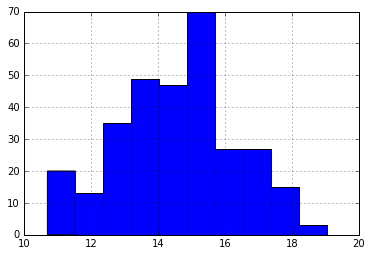

EUPG120


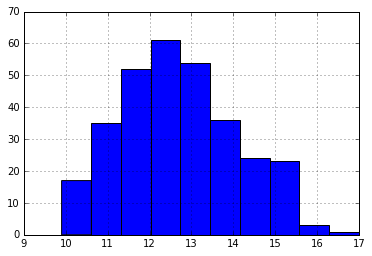

EUPG55


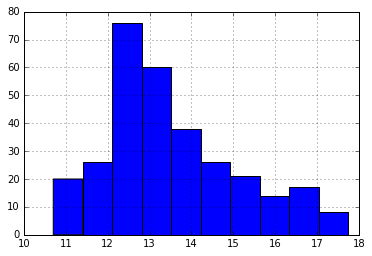

EUPG510


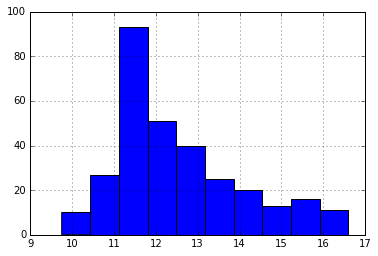

EUPG520


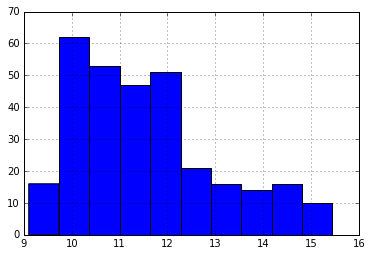

EUPG105


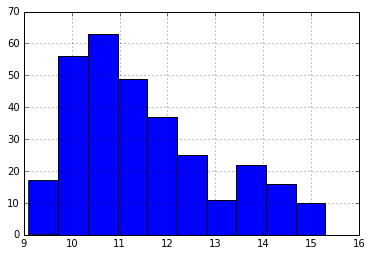

EUPG1010


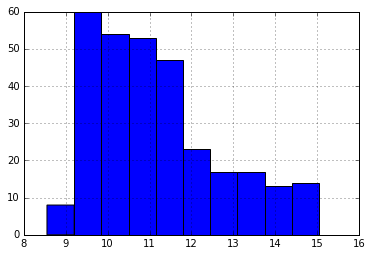

EUPG1020


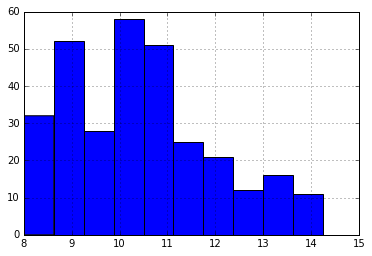

In [62]:
hist(black1)

EUPG15


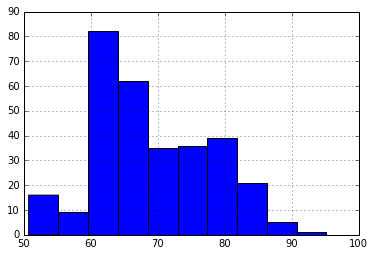

EUPG110


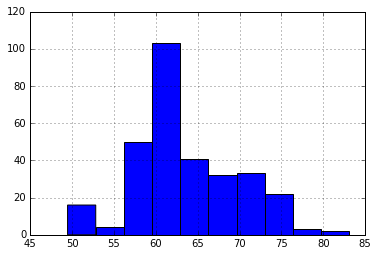

EUPG120


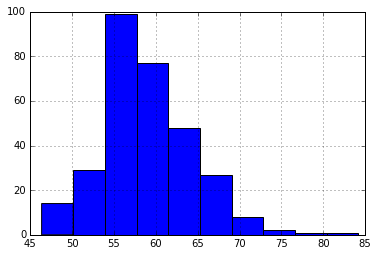

EUPG55


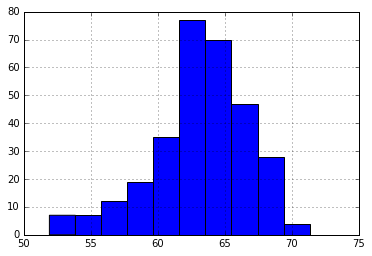

EUPG510


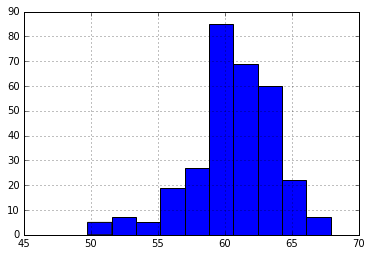

EUPG520


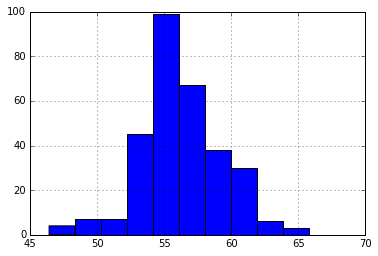

EUPG105


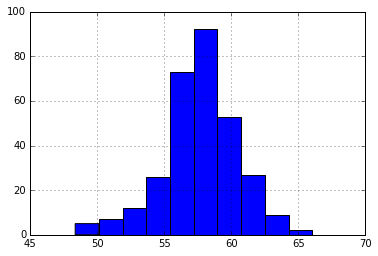

EUPG1010


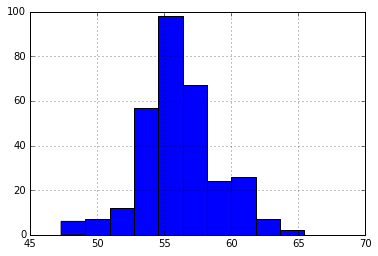

EUPG1020


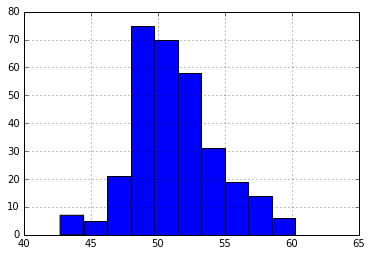

In [63]:
hist(bach1)

Les deux modèles semblent donenr des lois normales.

In [100]:

loi(black1,'norm')
loi(bach1,'norm')

EUPG15  ne suit pas une loi  norm
EUPG110  ne suit pas une loi  norm
EUPG120  ne suit pas une loi  norm
EUPG55  ne suit pas une loi  norm
EUPG510  ne suit pas une loi  norm
EUPG520  ne suit pas une loi  norm
EUPG105  ne suit pas une loi  norm
EUPG1010  ne suit pas une loi  norm
EUPG1020  ne suit pas une loi  norm
EUPG15  ne suit pas une loi  norm
EUPG110  ne suit pas une loi  norm
EUPG120  ne suit pas une loi  norm
EUPG55  ne suit pas une loi  norm
EUPG510  ne suit pas une loi  norm
EUPG520  ne suit pas une loi  norm
EUPG105  ne suit pas une loi  norm
EUPG1010  ne suit pas une loi  norm
EUPG1020  ne suit pas une loi  norm


In [108]:
corr(black1,bach1)

# Étude sur la période de "pic", entre Octobre 2008 et Novembre 2012

In [77]:
bach2 = bach[308:521]
black2 = black[308:521]

In [102]:
recap = pd.DataFrame()
print("Black : ")
for i, elem in enumerate(black2) :
    if i>0:
        recap = recap.append(black2[elem].describe(percentiles = [.05, .25, .5, .75, .95]))
print(recap)

recap2 = pd.DataFrame()
print("")
print("Bachelier : ")
for i, elem in enumerate(bach2) :
    if i>0:
        recap2 = recap2.append(bach2[elem].describe(percentiles = [.05, .25, .5, .75, .95]))
print(recap2)

Black : 
            25%      5%    50%     75%    95%  count     max       mean  \
EUPG15    26.90  24.540  29.70  40.300  49.50  213.0  57.000  33.382817   
EUPG110   23.30  19.880  26.20  33.800  42.15  213.0  46.500  28.523826   
EUPG120   21.50  19.380  25.10  31.800  39.62  213.0  44.425  27.113263   
EUPG55    17.10  15.800  19.95  26.825  32.61  213.0  39.350  21.734507   
EUPG510   16.85  15.350  19.10  25.425  30.85  213.0  37.150  20.941432   
EUPG520   17.60  15.910  19.40  25.900  31.30  213.0  38.900  21.475235   
EUPG105   13.90  12.900  16.30  21.850  25.95  213.0  33.100  17.756221   
EUPG1010  14.65  13.415  17.15  23.275  28.63  213.0  36.550  18.913263   
EUPG1020  16.20  14.450  18.25  23.350  27.95  213.0  36.750  19.905164   

             min       std  
EUPG15    21.450  8.480529  
EUPG110   18.350  7.031747  
EUPG120   18.000  6.722653  
EUPG55    13.625  5.627002  
EUPG510   12.950  5.131077  
EUPG520   13.900  5.122524  
EUPG105   11.400  4.405222  
EUPG1010

Les valeurs sont plus importahtes et plus dispersées que sur l'intervalle précédent. Le modèle de Bachelier qui donne les plus fortes variances.

Rouge : Bachelier
Bleu : Black
EUPG15


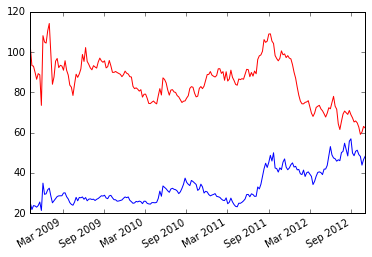

EUPG110


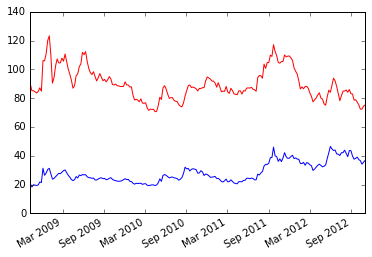

EUPG120


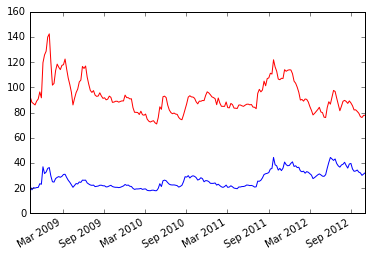

EUPG55


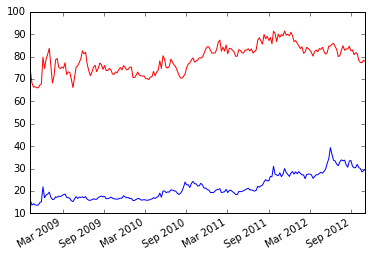

EUPG510


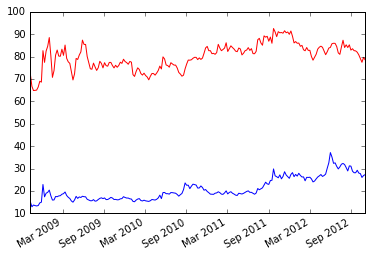

EUPG520


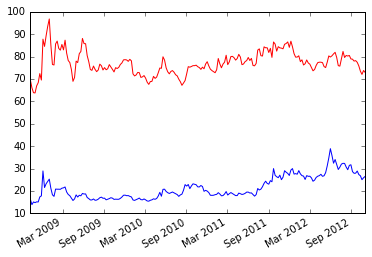

EUPG105


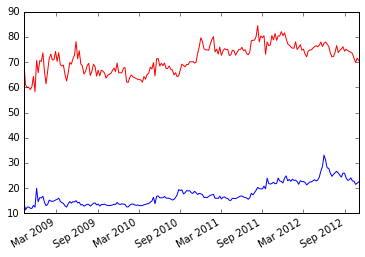

EUPG1010


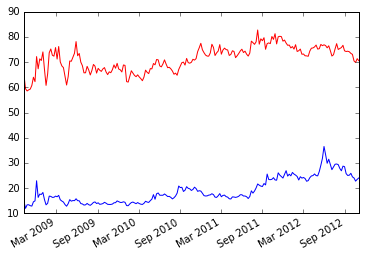

EUPG1020


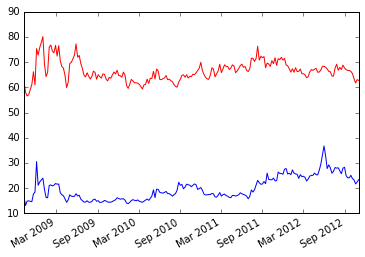

In [89]:
colors = ['RED','GREEN','BLUE','BLACK','ORANGE','PINK','BROWN','YELLOW','CYAN']
print("Rouge : Bachelier")
print("Bleu : Black")

for i, elem in enumerate(black2) :
    if i>0:
        print(elem)
        fig, ax = plt.subplots()
        ax.plot_date(black2['Date'], black2[elem],'-',color='BLUE')
        ax.plot_date(bach2['Date'], bach2[elem],'-',color='RED')
        fig.autofmt_xdate()
        plt.show()

In [80]:
corr(black2,bach2)

Les comportements sont très similaires lors de cette période de crise, mais les deux modèles ne sont toujours pas corrélés pour autant.

EUPG15


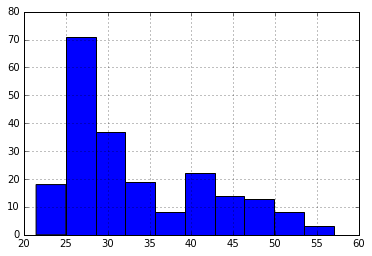

EUPG110


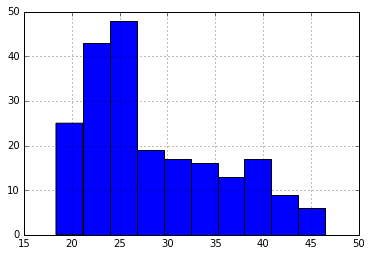

EUPG120


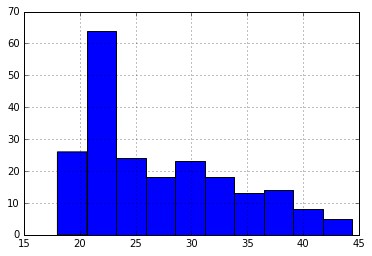

EUPG55


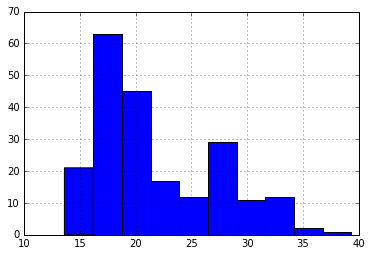

EUPG510


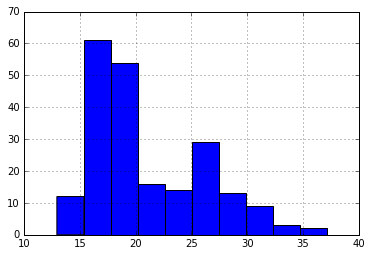

EUPG520


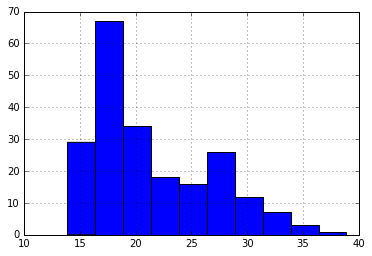

EUPG105


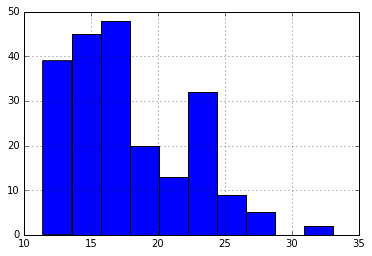

EUPG1010


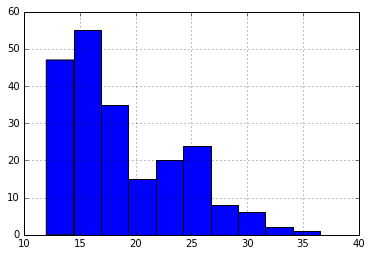

EUPG1020


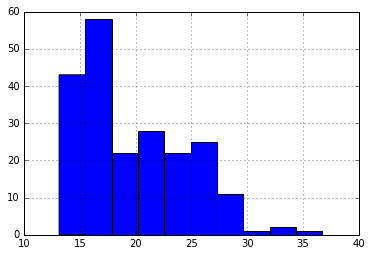

In [81]:
hist(black2)

EUPG15


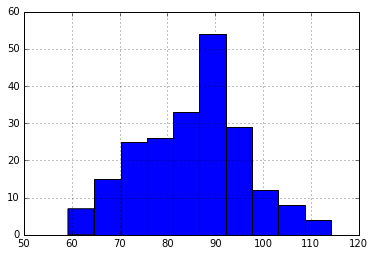

EUPG110


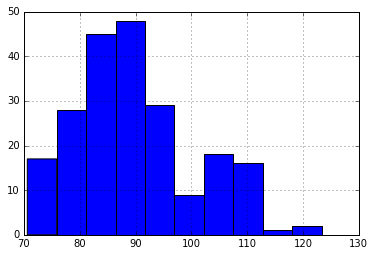

EUPG120


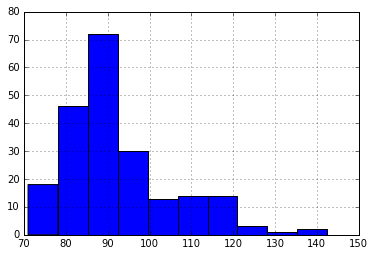

EUPG55


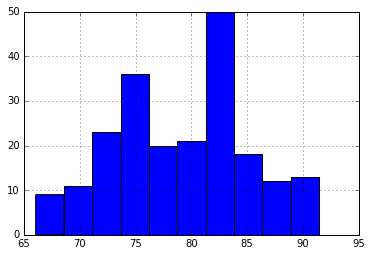

EUPG510


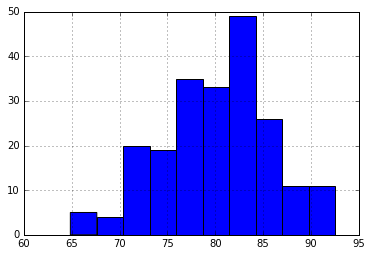

EUPG520


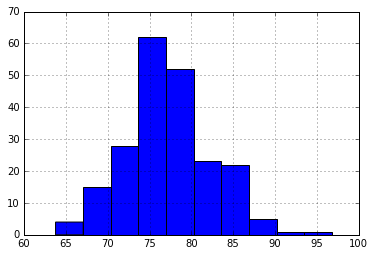

EUPG105


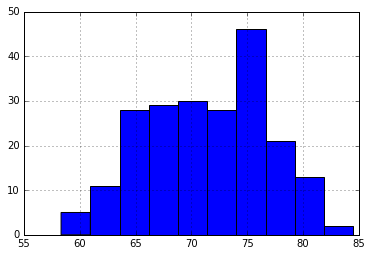

EUPG1010


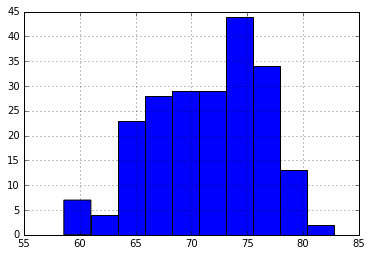

EUPG1020


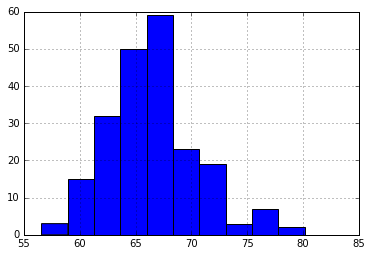

In [82]:
hist(bach2)

Certains swaptions suivent peut-être une loi exponentielle

In [84]:

loi(bach2,'norm')

EUPG15  ne suit pas une loi  norm
EUPG110  ne suit pas une loi  norm
EUPG120  ne suit pas une loi  norm
EUPG55  ne suit pas une loi  norm
EUPG510  ne suit pas une loi  norm
EUPG520  ne suit pas une loi  norm
EUPG105  ne suit pas une loi  norm
EUPG1010  ne suit pas une loi  norm
EUPG1020  ne suit pas une loi  norm


# Étude sur une période de comportement ératique : entre Novembre 2012 et 2016

Le taux EURIBOR suit une pente descendante relativement constante jusqu'en fin 2015. Il subit alors une courte chute.

In [86]:
black3 = black[522:]
bach3 = bach[522:]

In [90]:
recap = pd.DataFrame()

for i, elem in enumerate(black3) :
    if i>0:
        recap = recap.append(black3[elem].describe(percentiles = [.05, .25, .5, .75, .95]))
print(recap)

recap2 = pd.DataFrame()

for i, elem in enumerate(bach3) :
    if i>0:
        recap2 = recap2.append(bach3[elem].describe(percentiles = [.05, .25, .5, .75, .95]))
print(recap2)

             25%     5%     50%    75%      95%  count     max       mean  \
EUPG15    47.800  45.05  52.950  77.37  132.170  173.0  283.72  68.320925   
EUPG110   32.150  30.49  36.850  56.45   88.094  173.0  103.56  45.821908   
EUPG120   25.450  22.61  29.425  45.70   70.438  173.0   87.71  36.574884   
EUPG55    29.100  27.70  33.630  45.11   69.304  173.0  108.98  39.688410   
EUPG510   26.100  25.05  29.025  40.39   60.474  173.0   94.63  35.337948   
EUPG520   24.250  23.30  26.550  36.91   56.392  173.0   82.40  32.245318   
EUPG105   22.625  21.63  25.680  35.24   54.126  173.0   86.77  31.205925   
EUPG1010  23.150  21.99  25.080  35.92   53.432  173.0   85.97  31.436416   
EUPG1020  21.825  20.67  23.650  34.68   52.996  173.0   75.50  29.514220   

             min        std  
EUPG15    42.950  37.691076  
EUPG110   28.900  17.702219  
EUPG120   21.450  15.156486  
EUPG55    27.075  14.605697  
EUPG510   24.000  13.397402  
EUPG520   22.500  12.043325  
EUPG105   20.575  1

Rouge : Bachelier
Bleu : Black
EUPG15


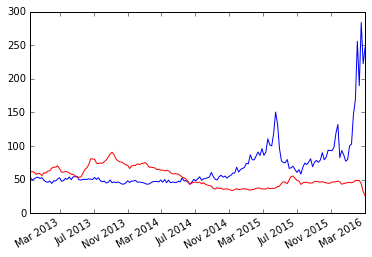

EUPG110


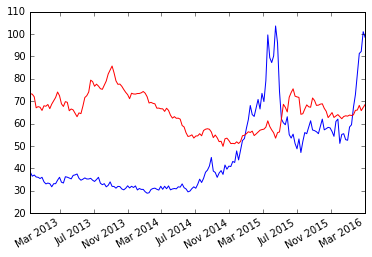

EUPG120


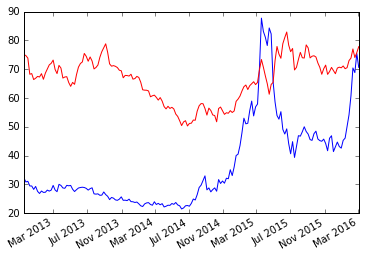

EUPG55


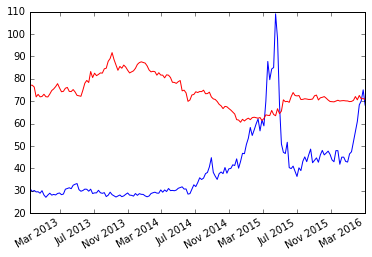

EUPG510


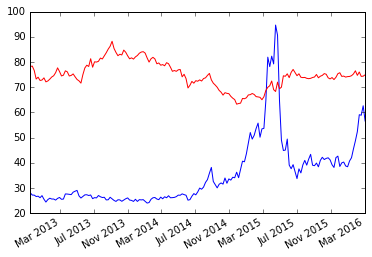

EUPG520


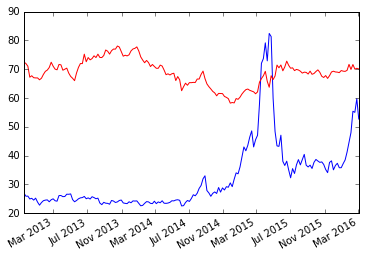

EUPG105


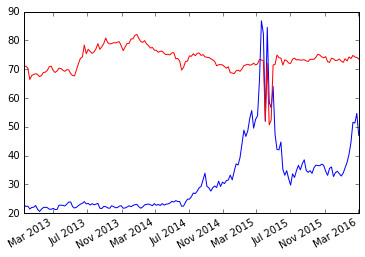

EUPG1010


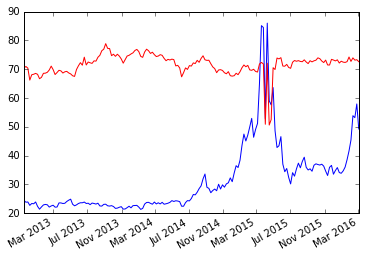

EUPG1020


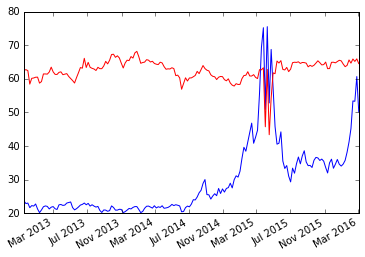

In [91]:
colors = ['RED','GREEN','BLUE','BLACK','ORANGE','PINK','BROWN','YELLOW','CYAN']
print("Rouge : Bachelier")
print("Bleu : Black")

for i, elem in enumerate(black3) :
    if i>0:
        print(elem)
        fig, ax = plt.subplots()
        ax.plot_date(black3['Date'], black3[elem],'-',color='BLUE')
        ax.plot_date(bach3['Date'], bach3[elem],'-',color='RED')
        fig.autofmt_xdate()
        plt.show()

Les valeurs sont en moyenne beaucoup plus élevées que précédemment. On observe une "plongée" des valeurs en 2016. Ce choc est particulièrement sensible pour le swaption de maturité 1 an et ténor 5 ans. Sa variance est très important sur cette période alors que les autres ont des comportements plus réguliers.

In [92]:
corr(bach3,black3)

EUPG15


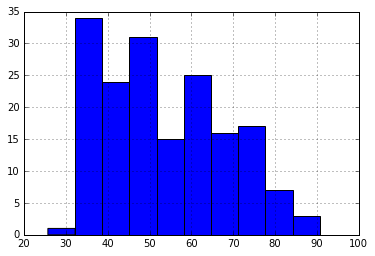

EUPG110


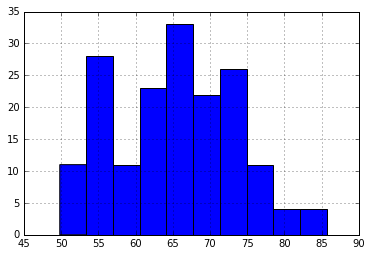

EUPG120


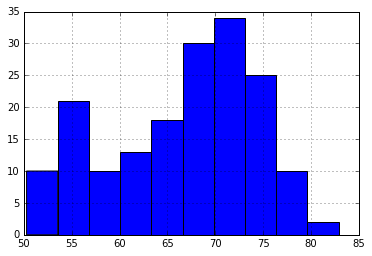

EUPG55


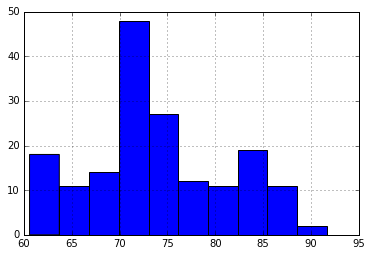

EUPG510


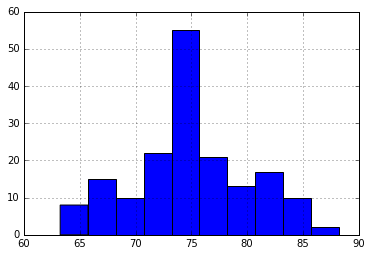

EUPG520


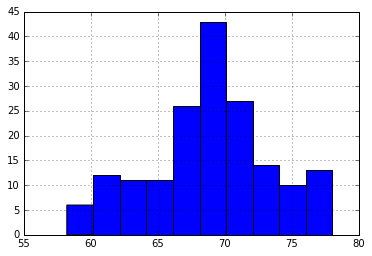

EUPG105


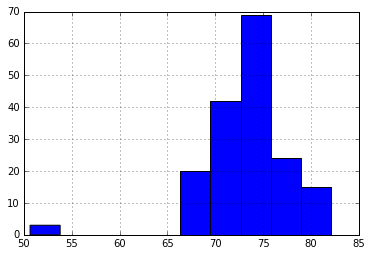

EUPG1010


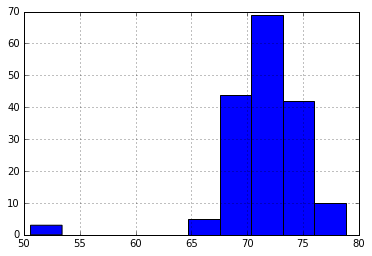

EUPG1020


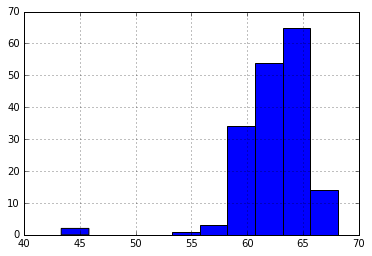

In [93]:
hist(bach3)

EUPG15


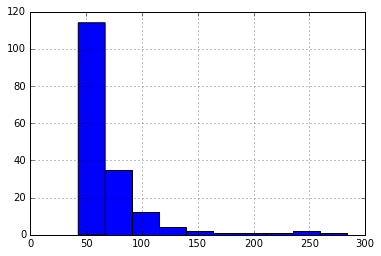

EUPG110


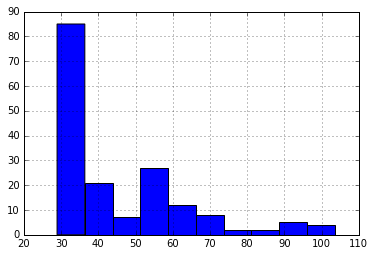

EUPG120


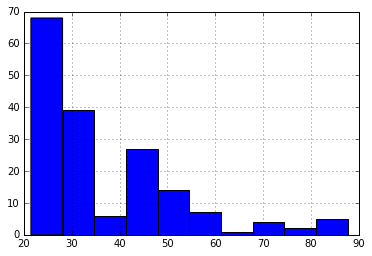

EUPG55


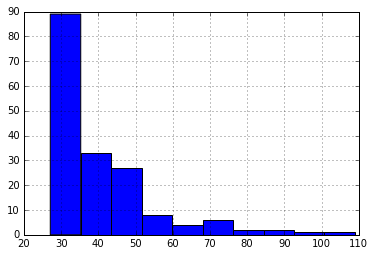

EUPG510


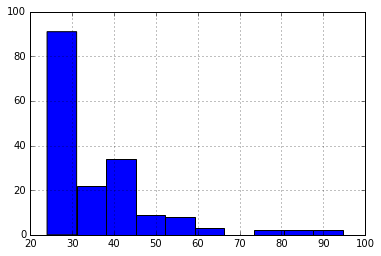

EUPG520


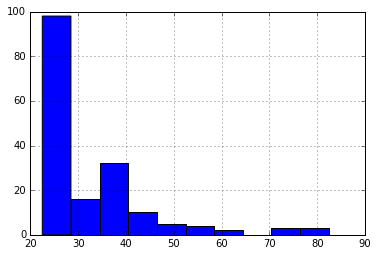

EUPG105


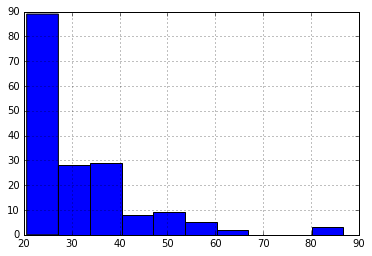

EUPG1010


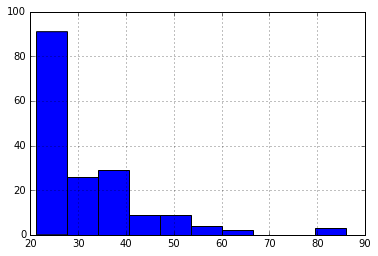

EUPG1020


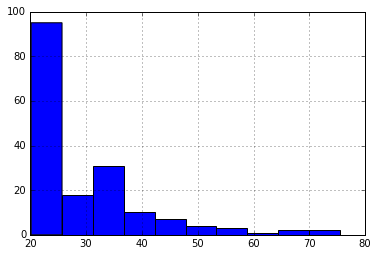

In [94]:
hist(black3)

In [95]:
loi(black3,'expon')

EUPG15  ne suit pas une loi  expon
EUPG110  ne suit pas une loi  expon
EUPG120  ne suit pas une loi  expon
EUPG55  ne suit pas une loi  expon
EUPG510  ne suit pas une loi  expon
EUPG520  ne suit pas une loi  expon
EUPG105  ne suit pas une loi  expon
EUPG1010  ne suit pas une loi  expon
EUPG1020  ne suit pas une loi  expon
